### plot behavioural results

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('../data/fmri_behavioural_new.csv')

In [5]:
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')

In [6]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,obs_p2g1,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,40.25
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,0.266667,0.733333,NaN,0.733333,0.266667,0.266667,78.90
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,0.633333,0.366667,NaN,0.366667,0.633333,0.633333,112.80
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,NaN,NaN,0.5,0.500000,0.500000,0.500000,148.20
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,183.55


In [9]:
dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
dfna['gen_p1'] = (dfna['gen_p1g1'] + dfna['gen_p1g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])
dfna['gen_p2'] = (dfna['gen_p2g1'] + dfna['gen_p2g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])

<ipython-input-9-b84b32298ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
<ipython-input-9-b84b32298ab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
<ipython-input-9-b84b32298ab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [10]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,...,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime,gen_p1g1,gen_p2g2,gen_p1,gen_p2
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,40.25,0.60,0.25,0.675,0.325
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,...,0.733333,NaN,0.733333,0.266667,0.266667,78.90,0.60,0.25,0.675,0.325
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,...,0.366667,NaN,0.366667,0.633333,0.633333,112.80,0.60,0.25,0.675,0.325
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,...,NaN,0.5,0.500000,0.500000,0.500000,148.20,0.15,0.65,0.250,0.750
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,183.55,0.15,0.65,0.250,0.750


In [11]:
dfna.shape

(2104, 21)

#### original plots of transitions

In [13]:
dfm1 = dfna[['gen_p1g2', 'obs_p1g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L|H)'] = dfm11['gen_p1g2']
dfm11['Rated p(L|H)'] = dfm11['obs_p1g2']
stats.pearsonr(dfm11['Generative p(L|H)'], dfm11['Rated p(L|H)'])

(0.13139930964025162, 3.589510548475801e-05)

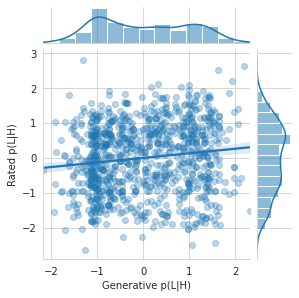

In [14]:
g = sns.jointplot(data=dfm11, x='Generative p(L|H)', y='Rated p(L|H)', kind='reg', 
                  scatter_kws={'alpha':0.3})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1g2.png', bbox_inches='tight')

In [15]:
# sns.lmplot(data=dfna, x='gen_p1g2', y='obs_p1g2', hue='subject')

In [16]:
dfm2 = dfna[['gen_p2g1', 'obs_p2g1', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H|L)'] = dfm22['gen_p2g1']
dfm22['Rated p(H|L)'] = dfm22['obs_p2g1']
stats.pearsonr(dfm22['Generative p(H|L)'], dfm22['Rated p(H|L)'])

(0.1187039171573626, 6.775759665809192e-05)

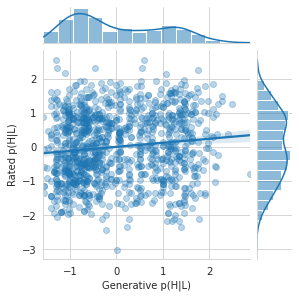

In [17]:
g = sns.jointplot(data=dfm22, x='Generative p(H|L)', y='Rated p(H|L)', kind='reg'
                 , scatter_kws={'alpha':0.3})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2g1.png', bbox_inches='tight')

In [18]:
dfm11_r = dfm11.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(L|H)'], x['Rated p(L|H)'])[0])

In [19]:
dfm22_r = dfm22.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|L)'], x['Rated p(H|L)'])[0])

In [20]:
dfm_sj = pd.DataFrame({'P(L|H)': dfm11_r, 'P(H|L)': dfm22_r})

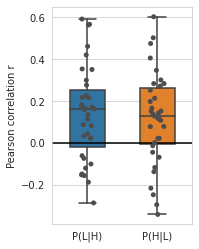

In [21]:
plt.subplots(figsize=(2.5,4))
g = sns.boxplot(data=dfm_sj, width=0.5)
g = sns.stripplot(data=dfm_sj, color='.3')
plt.axhline(0, color='k')
plt.ylabel('Pearson correlation r')
plt.savefig('./figs/genobs_pcorr.png', bbox_inches='tight')

In [22]:
dfm_sj.agg(['mean', 'std'])

,P(L|H),P(H|L)
mean,0.138441,0.117388
std,0.224694,0.220710


In [238]:
stats.ttest_1samp(dfm_sj, 0)

Ttest_1sampResult(statistic=array([3.64507447, 3.14656053]), pvalue=array([0.00088388, 0.00342618]))

#### new plots of frequencies

In [12]:
dfm1 = dfna[['gen_p1', 'obs_p1','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L)'] = dfm11['gen_p1']
dfm11['Rated p(L)'] = dfm11['obs_p1']
stats.pearsonr(dfm11['Generative p(L)'], dfm11['Rated p(L)'])

(0.19679890967439903, 8.168877970003726e-20)

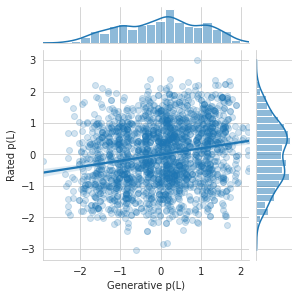

In [14]:
g = sns.jointplot(data=dfm11, x='Generative p(L)', y='Rated p(L)', kind='reg', 
                  scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1_genrate.png', bbox_inches='tight')

In [15]:
dfm2 = dfna[['gen_p2', 'obs_p2', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H)'] = dfm22['gen_p2']
dfm22['Rated p(H)'] = dfm22['obs_p2']
stats.pearsonr(dfm22['Generative p(H)'], dfm22['Rated p(H)'])

(0.19679890967439911, 8.168877970002798e-20)

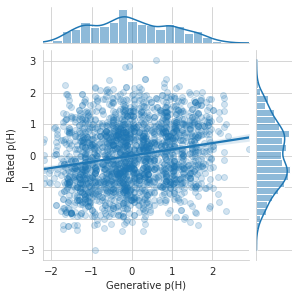

In [17]:
g = sns.jointplot(data=dfm22, x='Generative p(H)', y='Rated p(H)', kind='reg'
                 , scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2_genrate.png', bbox_inches='tight')

In [18]:
dfm11_r = dfm11.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(L)'], x['Rated p(L)'])[0])

In [19]:
dfm22_r = dfm22.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H)'], x['Rated p(H)'])[0])

In [25]:
# dfm_sj = pd.DataFrame({'P(L)': dfm11_r, 'P(H)': dfm22_r})
dfm_sj = pd.DataFrame({'P(L)': dfm11_r})

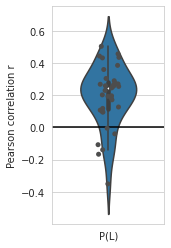

In [28]:
plt.subplots(figsize=(2,4))
# g = sns.boxplot(data=dfm_sj, width=0.5)
g = sns.violinplot(data=dfm_sj, width=0.5)
g = sns.stripplot(data=dfm_sj, color='.3')
plt.axhline(0, color='k')
plt.ylabel('Pearson correlation r')
plt.savefig('./figs/genobs_pcorr_lh.png', bbox_inches='tight')

In [29]:
dfm_sj.agg(['mean', 'std'])

,P(L)
mean,0.195915
std,0.189984


In [30]:
stats.ttest_1samp(dfm_sj, 0)

Ttest_1sampResult(statistic=array([6.10075143]), pvalue=array([6.37512013e-07]))